# Linear Algebra Tweet Sentiment Classifier

### INTRODUCTION

In [17]:
#READING DATA
import pandas as pd
import numpy as np #import numpy
from sklearn.utils import shuffle
import json

#CLEANING DATA
import string #for function removing punctuation
import re #for tokenization
import nltk #for removing stop words 
ps = nltk.PorterStemmer() #for stemming
wn = nltk.WordNetLemmatizer() #for lemmatizing

#VECTORIZING DATA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#MODELING DATA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [12]:
#Set pandas so that the dataframe column width will be expanded, so 
#we can see more of what is happening in our cleaning steps
pd.set_option('display.max_colwidth',100)

### Reading in data

In [18]:
df = pd.read_json('/Users/eampo/Desktop/InfinityWars/infinitywars.json', lines = True)

In [ ]:
normalized_data = json_normalize(data=df['programs'], record_path='works', 
                            meta=['id', 'orchestra','programID', 'season'])

In [14]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,None,2018-04-27 02:50:00,NaN,"{u'user_mentions': [{u'id': 48819054, u'indices': [0, 11], u'id_str': u'48819054', u'screen_name...",NaN,"{u'display_text_range': [0, 169], u'entities': {u'user_mentions': [{u'id': 48819054, u'indices':...",0,False,low,...,NaN,0,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@LaceySwope I just now found you! I love you accent and your worry about Infinity Wars spoilers!...,2018-04-27 02:50:00.378,True,"{u'follow_request_sent': None, u'profile_use_background_image': True, u'default_profile_image': ..."
1,NaN,None,2018-04-27 02:50:01,NaN,"{u'user_mentions': [{u'id': 40179650, u'indices': [3, 16], u'id_str': u'40179650', u'screen_name...",NaN,NaN,0,False,low,...,9.896973e+17,0,0,False,"{u'quote_count': 0, u'contributors': None, u'truncated': False, u'text': u'Bruh...niggas rattled...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @DaddycoonSOD: Bruh...niggas rattled off who died already smh https://t.co/01iNo1MtID,2018-04-27 02:50:01.554,False,"{u'follow_request_sent': None, u'profile_use_background_image': True, u'default_profile_image': ..."
2,NaN,None,2018-04-27 02:50:03,"[0, 9]","{u'user_mentions': [], u'symbols': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/mQ8OTk...",NaN,NaN,0,False,low,...,9.893123e+17,0,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OH MY GOD https://t.co/mQ8OTkH2qJ,2018-04-27 02:50:03.023,False,"{u'follow_request_sent': None, u'profile_use_background_image': True, u'default_profile_image': ..."
3,NaN,None,2018-04-27 02:50:05,NaN,"{u'user_mentions': [{u'id': 43702545, u'indices': [3, 16], u'id_str': u'43702545', u'screen_name...",NaN,NaN,0,False,low,...,NaN,0,0,False,"{u'quote_count': 1123, u'contributors': None, u'truncated': True, u'text': u'Marvel just posted ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @NaimHumphrey: Marvel just posted this via Facebook. \n\nAvengers vs Xmen: 2020.\n\nAfter las...,2018-04-27 02:50:05.230,False,"{u'follow_request_sent': None, u'profile_use_background_image': True, u'default_profile_image': ..."
4,NaN,None,2018-04-27 02:50:05,"[0, 18]","{u'user_mentions': [], u'symbols': [], u'hashtags': [], u'urls': [{u'url': u'https://t.co/ZLGFzR...",NaN,NaN,0,False,low,...,9.893123e+17,0,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Terrible photoshop https://t.co/ZLGFzRsuP1,2018-04-27 02:50:05.605,False,"{u'follow_request_sent': None, u'profile_use_background_image': True, u'default_profile_image': ..."


Remove unnecessary columns.

In [16]:
InfinityWars.to_csv('InfinityWars_Predictions_3.csv', encoding='utf-8')

In [15]:
InfinityWars = df[['text','lang','created_at','favorited']]

### Filtering out for tweets in english language.

In [6]:
infinity = InfinityWars.loc[InfinityWars['lang'] == 'en']

In [7]:
print len(infinity)

9416


In [10]:
infinity.to_csv('InfinityWars_Predictions_2.csv', encoding='utf-8')

In [8]:
infinity.head(10)

,text,lang,created_at,favorited
0,@LaceySwope I just now found you! I love you accent and your worry about Infinity Wars spoilers!...,en,2018-04-27 02:50:00,False
1,RT @DaddycoonSOD: Bruh...niggas rattled off who died already smh https://t.co/01iNo1MtID,en,2018-04-27 02:50:01,False
2,OH MY GOD https://t.co/mQ8OTkH2qJ,en,2018-04-27 02:50:03,False
3,RT @NaimHumphrey: Marvel just posted this via Facebook. \n\nAvengers vs Xmen: 2020.\n\nAfter las...,en,2018-04-27 02:50:05,False
4,Terrible photoshop https://t.co/ZLGFzRsuP1,en,2018-04-27 02:50:05,False
5,RT @gawdzillah: I heard in infinity wars that the avengers couldn’t take down Thanos so they ca...,en,2018-04-27 02:50:09,False
6,Damn. Infinity Wars was great. Wish I could fast forward to 2019.,en,2018-04-27 02:50:10,False
7,All Infinity Wars did was make me cry a lot.,en,2018-04-27 02:50:10,False
8,RT @sirbrittt: a friendly reminder to whoever is seeing Infinity Wars tonight: \n\nIF YOU SO MUC...,en,2018-04-27 02:50:13,False
9,i can’t say anything ab infinity wars bc literally no oNE HAS WATCHED IT,en,2018-04-27 02:50:15,False


## CLEANING

### Removing punctuation in our tweets.

In [46]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

infinity['text_clean'] = infinity['text'].apply(lambda x: remove_punct(x))

/Users/eampo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
infinity.head()

,text,lang,text_clean
0,@LaceySwope I just now found you! I love you a...,en,LaceySwope I just now found you I love you acc...
1,RT @DaddycoonSOD: Bruh...niggas rattled off wh...,en,RT DaddycoonSOD Bruhniggas rattled off who die...
2,OH MY GOD https://t.co/mQ8OTkH2qJ,en,OH MY GOD httpstcomQ8OTkH2qJ
3,RT @NaimHumphrey: Marvel just posted this via ...,en,RT NaimHumphrey Marvel just posted this via Fa...
4,Terrible photoshop https://t.co/ZLGFzRsuP1,en,Terrible photoshop httpstcoZLGFzRsuP1


### Tokenizing our tweets (and transform tweets into lowercase)

In [68]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

infinity['text_tokenized'] = infinity['text_clean'].apply(lambda x: tokenize(x.lower()))

/Users/eampo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [70]:
infinity.head()

,text,lang,text_clean,text_tokenized
0,@LaceySwope I just now found you! I love you a...,en,LaceySwope I just now found you I love you acc...,"[laceyswope, i, just, now, found, you, i, love..."
1,RT @DaddycoonSOD: Bruh...niggas rattled off wh...,en,RT DaddycoonSOD Bruhniggas rattled off who die...,"[rt, daddycoonsod, bruhniggas, rattled, off, w..."
2,OH MY GOD https://t.co/mQ8OTkH2qJ,en,OH MY GOD httpstcomQ8OTkH2qJ,"[oh, my, god, httpstcomq8otkh2qj]"
3,RT @NaimHumphrey: Marvel just posted this via ...,en,RT NaimHumphrey Marvel just posted this via Fa...,"[rt, naimhumphrey, marvel, just, posted, this,..."
4,Terrible photoshop https://t.co/ZLGFzRsuP1,en,Terrible photoshop httpstcoZLGFzRsuP1,"[terrible, photoshop, httpstcozlgfzrsup1]"


### Removing stop words in our tweets

In [7]:
stopword = nltk.corpus.stopwords.words('english')

In [85]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

infinity['text_nostop'] = infinity['text_tokenized'].apply(lambda x: remove_stopwords(x))

/Users/eampo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [93]:
infinity.head(10)

,text,lang,text_clean,text_tokenized,text_nostop
0,@LaceySwope I just now found you! I love you accent and your worry about Infinity Wars spoilers!...,en,LaceySwope I just now found you I love you accent and your worry about Infinity Wars spoilers lo...,"[laceyswope, i, just, now, found, you, i, love, you, accent, and, your, worry, about, infinity, ...","[laceyswope, found, love, accent, worry, infinity, wars, spoilers, lol, thank, httpstcotkga6jawy4]"
1,RT @DaddycoonSOD: Bruh...niggas rattled off who died already smh https://t.co/01iNo1MtID,en,RT DaddycoonSOD Bruhniggas rattled off who died already smh httpstco01iNo1MtID,"[rt, daddycoonsod, bruhniggas, rattled, off, who, died, already, smh, httpstco01ino1mtid]","[rt, daddycoonsod, bruhniggas, rattled, died, already, smh, httpstco01ino1mtid]"
2,OH MY GOD https://t.co/mQ8OTkH2qJ,en,OH MY GOD httpstcomQ8OTkH2qJ,"[oh, my, god, httpstcomq8otkh2qj]","[oh, god, httpstcomq8otkh2qj]"
3,RT @NaimHumphrey: Marvel just posted this via Facebook. \n\nAvengers vs Xmen: 2020.\n\nAfter las...,en,RT NaimHumphrey Marvel just posted this via Facebook \n\nAvengers vs Xmen 2020\n\nAfter last nig...,"[rt, naimhumphrey, marvel, just, posted, this, via, facebook, avengers, vs, xmen, 2020, after, l...","[rt, naimhumphrey, marvel, posted, via, facebook, avengers, vs, xmen, 2020, last, night, infinit..."
4,Terrible photoshop https://t.co/ZLGFzRsuP1,en,Terrible photoshop httpstcoZLGFzRsuP1,"[terrible, photoshop, httpstcozlgfzrsup1]","[terrible, photoshop, httpstcozlgfzrsup1]"
5,RT @gawdzillah: I heard in infinity wars that the avengers couldn’t take down Thanos so they ca...,en,RT gawdzillah I heard in infinity wars that the avengers couldn’t take down Thanos so they call...,"[rt, gawdzillah, i, heard, in, infinity, wars, that, the, avengers, couldn, t, take, down, thano...","[rt, gawdzillah, heard, infinity, wars, avengers, take, thanos, call, justice, league, back]"
6,Damn. Infinity Wars was great. Wish I could fast forward to 2019.,en,Damn Infinity Wars was great Wish I could fast forward to 2019,"[damn, infinity, wars, was, great, wish, i, could, fast, forward, to, 2019]","[damn, infinity, wars, great, wish, could, fast, forward, 2019]"
7,All Infinity Wars did was make me cry a lot.,en,All Infinity Wars did was make me cry a lot,"[all, infinity, wars, did, was, make, me, cry, a, lot]","[infinity, wars, make, cry, lot]"
8,RT @sirbrittt: a friendly reminder to whoever is seeing Infinity Wars tonight: \n\nIF YOU SO MUC...,en,RT sirbrittt a friendly reminder to whoever is seeing Infinity Wars tonight \n\nIF YOU SO MUCH A...,"[rt, sirbrittt, a, friendly, reminder, to, whoever, is, seeing, infinity, wars, tonight, if, you...","[rt, sirbrittt, friendly, reminder, whoever, seeing, infinity, wars, tonight, much, whisper, typ..."
9,i can’t say anything ab infinity wars bc literally no oNE HAS WATCHED IT,en,i can’t say anything ab infinity wars bc literally no oNE HAS WATCHED IT,"[i, can, t, say, anything, ab, infinity, wars, bc, literally, no, one, has, watched, it]","[say, anything, ab, infinity, wars, bc, literally, one, watched]"


### Stemming our tweets (stripping down words to its base)

In [96]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

infinity['text_stemmed'] = infinity['text_nostop'].apply(lambda x: stemming(x))

/Users/eampo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [98]:
infinity.head(10)

,text,lang,text_clean,text_tokenized,text_nostop,text_stemmed
0,@LaceySwope I just now found you! I love you accent and your worry about Infinity Wars spoilers!...,en,LaceySwope I just now found you I love you accent and your worry about Infinity Wars spoilers lo...,"[laceyswope, i, just, now, found, you, i, love, you, accent, and, your, worry, about, infinity, ...","[laceyswope, found, love, accent, worry, infinity, wars, spoilers, lol, thank, httpstcotkga6jawy4]","[laceyswop, found, love, accent, worri, infin, war, spoiler, lol, thank, httpstcotkga6jawy4]"
1,RT @DaddycoonSOD: Bruh...niggas rattled off who died already smh https://t.co/01iNo1MtID,en,RT DaddycoonSOD Bruhniggas rattled off who died already smh httpstco01iNo1MtID,"[rt, daddycoonsod, bruhniggas, rattled, off, who, died, already, smh, httpstco01ino1mtid]","[rt, daddycoonsod, bruhniggas, rattled, died, already, smh, httpstco01ino1mtid]","[rt, daddycoonsod, bruhnigga, rattl, die, alreadi, smh, httpstco01ino1mtid]"
2,OH MY GOD https://t.co/mQ8OTkH2qJ,en,OH MY GOD httpstcomQ8OTkH2qJ,"[oh, my, god, httpstcomq8otkh2qj]","[oh, god, httpstcomq8otkh2qj]","[oh, god, httpstcomq8otkh2qj]"
3,RT @NaimHumphrey: Marvel just posted this via Facebook. \n\nAvengers vs Xmen: 2020.\n\nAfter las...,en,RT NaimHumphrey Marvel just posted this via Facebook \n\nAvengers vs Xmen 2020\n\nAfter last nig...,"[rt, naimhumphrey, marvel, just, posted, this, via, facebook, avengers, vs, xmen, 2020, after, l...","[rt, naimhumphrey, marvel, posted, via, facebook, avengers, vs, xmen, 2020, last, night, infinit...","[rt, naimhumphrey, marvel, post, via, facebook, aveng, vs, xmen, 2020, last, night, infin, war, ..."
4,Terrible photoshop https://t.co/ZLGFzRsuP1,en,Terrible photoshop httpstcoZLGFzRsuP1,"[terrible, photoshop, httpstcozlgfzrsup1]","[terrible, photoshop, httpstcozlgfzrsup1]","[terribl, photoshop, httpstcozlgfzrsup1]"
5,RT @gawdzillah: I heard in infinity wars that the avengers couldn’t take down Thanos so they ca...,en,RT gawdzillah I heard in infinity wars that the avengers couldn’t take down Thanos so they call...,"[rt, gawdzillah, i, heard, in, infinity, wars, that, the, avengers, couldn, t, take, down, thano...","[rt, gawdzillah, heard, infinity, wars, avengers, take, thanos, call, justice, league, back]","[rt, gawdzillah, heard, infin, war, aveng, take, thano, call, justic, leagu, back]"
6,Damn. Infinity Wars was great. Wish I could fast forward to 2019.,en,Damn Infinity Wars was great Wish I could fast forward to 2019,"[damn, infinity, wars, was, great, wish, i, could, fast, forward, to, 2019]","[damn, infinity, wars, great, wish, could, fast, forward, 2019]","[damn, infin, war, great, wish, could, fast, forward, 2019]"
7,All Infinity Wars did was make me cry a lot.,en,All Infinity Wars did was make me cry a lot,"[all, infinity, wars, did, was, make, me, cry, a, lot]","[infinity, wars, make, cry, lot]","[infin, war, make, cri, lot]"
8,RT @sirbrittt: a friendly reminder to whoever is seeing Infinity Wars tonight: \n\nIF YOU SO MUC...,en,RT sirbrittt a friendly reminder to whoever is seeing Infinity Wars tonight \n\nIF YOU SO MUCH A...,"[rt, sirbrittt, a, friendly, reminder, to, whoever, is, seeing, infinity, wars, tonight, if, you...","[rt, sirbrittt, friendly, reminder, whoever, seeing, infinity, wars, tonight, much, whisper, typ...","[rt, sirbrittt, friendli, remind, whoever, see, infin, war, tonight, much, whisper, type, letter..."
9,i can’t say anything ab infinity wars bc literally no oNE HAS WATCHED IT,en,i can’t say anything ab infinity wars bc literally no oNE HAS WATCHED IT,"[i, can, t, say, anything, ab, infinity, wars, bc, literally, no, one, has, watched, it]","[say, anything, ab, infinity, wars, bc, literally, one, watched]","[say, anyth, ab, infin, war, bc, liter, one, watch]"


### Lemmatizing our tweets

This is another approach to stripping down a word to its base, just like stemming. However, the main difference is that lemmatization takes into account the context of a word.

In [101]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

infinity['text_lemmatized'] = infinity['text_nostop'].apply(lambda x: lemmatizing(x))

/Users/eampo/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [102]:
infinity.head()

,text,lang,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized
0,@LaceySwope I just now found you! I love you accent and your worry about Infinity Wars spoilers!...,en,LaceySwope I just now found you I love you accent and your worry about Infinity Wars spoilers lo...,"[laceyswope, i, just, now, found, you, i, love, you, accent, and, your, worry, about, infinity, ...","[laceyswope, found, love, accent, worry, infinity, wars, spoilers, lol, thank, httpstcotkga6jawy4]","[laceyswop, found, love, accent, worri, infin, war, spoiler, lol, thank, httpstcotkga6jawy4]","[laceyswope, found, love, accent, worry, infinity, war, spoiler, lol, thank, httpstcotkga6jawy4]"
1,RT @DaddycoonSOD: Bruh...niggas rattled off who died already smh https://t.co/01iNo1MtID,en,RT DaddycoonSOD Bruhniggas rattled off who died already smh httpstco01iNo1MtID,"[rt, daddycoonsod, bruhniggas, rattled, off, who, died, already, smh, httpstco01ino1mtid]","[rt, daddycoonsod, bruhniggas, rattled, died, already, smh, httpstco01ino1mtid]","[rt, daddycoonsod, bruhnigga, rattl, die, alreadi, smh, httpstco01ino1mtid]","[rt, daddycoonsod, bruhniggas, rattled, died, already, smh, httpstco01ino1mtid]"
2,OH MY GOD https://t.co/mQ8OTkH2qJ,en,OH MY GOD httpstcomQ8OTkH2qJ,"[oh, my, god, httpstcomq8otkh2qj]","[oh, god, httpstcomq8otkh2qj]","[oh, god, httpstcomq8otkh2qj]","[oh, god, httpstcomq8otkh2qj]"
3,RT @NaimHumphrey: Marvel just posted this via Facebook. \n\nAvengers vs Xmen: 2020.\n\nAfter las...,en,RT NaimHumphrey Marvel just posted this via Facebook \n\nAvengers vs Xmen 2020\n\nAfter last nig...,"[rt, naimhumphrey, marvel, just, posted, this, via, facebook, avengers, vs, xmen, 2020, after, l...","[rt, naimhumphrey, marvel, posted, via, facebook, avengers, vs, xmen, 2020, last, night, infinit...","[rt, naimhumphrey, marvel, post, via, facebook, aveng, vs, xmen, 2020, last, night, infin, war, ...","[rt, naimhumphrey, marvel, posted, via, facebook, avenger, v, xmen, 2020, last, night, infinity,..."
4,Terrible photoshop https://t.co/ZLGFzRsuP1,en,Terrible photoshop httpstcoZLGFzRsuP1,"[terrible, photoshop, httpstcozlgfzrsup1]","[terrible, photoshop, httpstcozlgfzrsup1]","[terribl, photoshop, httpstcozlgfzrsup1]","[terrible, photoshop, httpstcozlgfzrsup1]"


### Clean our Training Set using steps outlined above.

In [5]:
tweets = pd.read_csv("../InfinityWars/training_tweets_1.csv", encoding='latin-1', header=None)
tweets = shuffle(tweets)
tweets.columns = ["sentiment", "id", "date", "query", "user", "text"]
tweets = tweets.drop(["id", "date", "query", "user"], axis = 1)
tweets_1 = tweets[0:25000]
len(tweets_1)

25000

In [175]:
tweets_1.head()

,sentiment,text
327324,0,So tired. I just ended .. Cause i was studing Biology ok . See you all tommorow twitters. Peace...
1539417,4,"@sunbug thanks! the eco felt comes in some really lush colours and great mottled ones too, tryin..."
451590,0,"i'm so confused, i'm going to cry in about two seconds haaa"
7814,0,"@missezrenee Poor baby, I have a bad throat also IT SUCKS!"
1261771,4,is gonna have tons of side work to do this week *excited*. Almost feels like I have two jobs now


In [3]:
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

## LINEAR ALGEBRA APPLICATION

### TERM FREQUENCY MATRIX

Our team built a Term Frequency Matrix (Vector Space Model), which created a matrix of tweets (documents) against the count of terms in that tweet.

### 1 Count Vectorization of Training Set

This is the first part

In [177]:
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(tweets_1['text'])

#### Here is just a look at just a sample to see what's happening more clearly

In [178]:
tweets_sample = tweets_1[0:20]

count_vect_sample = CountVectorizer(analyzer = clean_text)
X_counts_sample = count_vect_sample.fit_transform(tweets_sample['text'])

print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 192)
[u'', u'360', u'8', u'AM', u'I', u'IF', u'IT', u'Im', u'It', u'So', u'absolut', u'affect', u'age', u'ahead', u'almost', u'alreadi', u'also', u'attenit', u'babi', u'bad', u'big', u'biolog', u'blow', u'boy', u'brace', u'but', u'call', u'caus', u'check', u'chill', u'chitellmsft', u'chri', u'cologn', u'colour', u'come', u'comparison', u'confront', u'confus', u'control', u'coz', u'cri', u'day', u'definit', u'devhamm', u'didnt', u'dinner', u'disclaim', u'disney', u'disneyland', u'dizzi', u'dont', u'eat', u'eco', u'effect', u'end', u'excit', u'eye', u'fair', u'favorit', u'fear', u'feel', u'felt', u'first', u'friend', u'fuck', u'gave', u'give', u'glass', u'go', u'gonna', u'good', u'got', u'great', u'guy', u'haaa', u'have', u'hey', u'home', u'hour', u'hous', u'how', u'ill', u'im', u'interest', u'job', u'john', u'ju', u'just', u'knock', u'know', u'last', u'lean', u'left', u'len', u'life', u'like', u'live', u'long', u'love', u'lush', u'machin', u'make', u'mass', u'missezrene', u'mmm', u

#### Below is the document term matrix for the first twenty rows.

In [141]:
X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

,,2,30,7572955745,A,At,I,If,Im,My,...,w,wait,watch,well,wish,woohoo,work,would,xbox,xx
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### INVERSE DOCUMENT FREQUENCY MATRIX

The Term Frequency matrix is helpful to understand which words occurred the most in our corpus. However, if we are going to use this as features for our classification model, then it would place more weight on frequently occurring terms that are not necessarily predictive. So, in order to solve that issue, we are going to perform a matrix transformation to our term-frequency matrix.  

The Inverse Document Frequency equation is used in natural language processing in order to place more weight on less frequently occuring words and place less weight on more frequently occurring words.

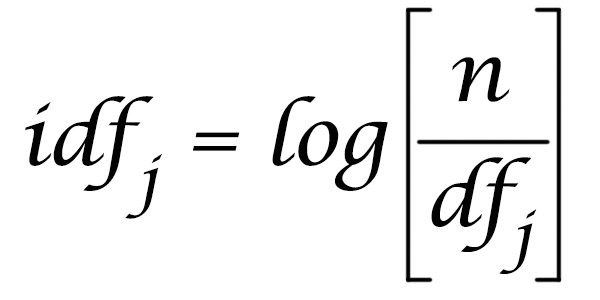

We will then apply this equation to each term.  After getting this vector of weights, we will apply the weights to our term-frequency matrix. Afterwards, we will perform a matrix-matrix multiplication, which will provide us with the Term Frequency Inverse Document Frequency matrix that we can use as the features for our classification model.

### Vectorizing using Term Frequency-Inverse Document Frequency (TF-IDF)

In [8]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets_1['text'])
print(X_tfidf.shape)

(25000, 34548)


In [180]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()

In [182]:
X_tfidf_df.head(10)

,,0,00,000,0030,0045,00g,00k,02,0230,...,zydratefairi,zyrtec,zzeba,zztzed,zzz,zzzz,zzzzz,zzzzzz,zzzzzzz,zzzzzzzzzz
0,0.054507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.066930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.065764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.055535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.054255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.050970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.055772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### MACHINE LEARNING

#### Random Forest Classifier (with TF-IDF Vectorizer)

In [190]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets_1['text'])
X_features = tfidf_vect.fit_transform(tweets_1['text'])

In [186]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getitem__', '__getstate__', '__hash__', '__init__', '__iter__', '__len__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            m

Set up classifier through cross-validation.

In [191]:
rf = RandomForestClassifier(n_jobs = -1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, tweets_1['sentiment'],cv = k_fold, scoring = 'accuracy', n_jobs=-1)

array([0.709 , 0.703 , 0.7158, 0.713 , 0.7038])

#### Exploring the results of classifier.

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_features,tweets_1['sentiment'], test_size = .2)


In [204]:
rdf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rdf_model = rdf.fit(X_train, y_train)

In [212]:
y_pred = rdf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label = 4, average = 'binary')

In [237]:
print(precision)
print(recall)

0.6843971631205674
0.7760353839967833


In [218]:
y_pred

array([4, 0, 4, ..., 4, 0, 0])

In [238]:
y_pred_df = pd.DataFrame(y_pred)

### APPLICATION to Infinity Wars Dataset

Apply TFIDF vectorizer to infinity wars

In [265]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets_1['text'])
Y_tfidf = tfidf_vect.transform(infinity['text'])

In [266]:
Y_TFIDF_PRED = rdf_model.predict(Y_tfidf)

In [268]:
len(Y_TFIDF_PRED)

9416

In [269]:
InfinityWars_PRED_df = pd.DataFrame(Y_TFIDF_PRED)

In [294]:
InfinityWars_Predictions = infinity.join(InfinityWars_PRED_df).encode('utf-8').strip()
InfinityWars_Predictions.columns = ['tweet','language','prediction']
InfinityWars_Predictions = InfinityWars_Predictions.drop(['language'],axis = 1)

AttributeError: 'DataFrame' object has no attribute 'encode'

In [283]:
InfinityWars_Predictions.head()

,tweet,prediction
0,@LaceySwope I just now found you! I love you accent and your worry about Infinity Wars spoilers!...,4.0
1,RT @DaddycoonSOD: Bruh...niggas rattled off who died already smh https://t.co/01iNo1MtID,4.0
2,OH MY GOD https://t.co/mQ8OTkH2qJ,4.0
3,RT @NaimHumphrey: Marvel just posted this via Facebook. \n\nAvengers vs Xmen: 2020.\n\nAfter las...,4.0
4,Terrible photoshop https://t.co/ZLGFzRsuP1,0.0


In [296]:
InfinityWars_Predictions.to_csv('InfinityWars_Predictions.csv', encoding='utf-8')